In [1]:
from autumn.tools.project import get_project
from autumn.settings import Region
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

In [2]:
project = get_project("covid_19", "victoria_2021")

In [3]:
params_baseline = project.param_set.baseline
# pretty_print(params_baseline)

In [4]:
updates = {'contact_rate': 0.4}
new_params = params_baseline.update(updates)

In [5]:
model = project.run_baseline_model(new_params)

In [6]:
derived_df = model.get_derived_outputs_df()#.iloc[:70]

# Service-level notifications

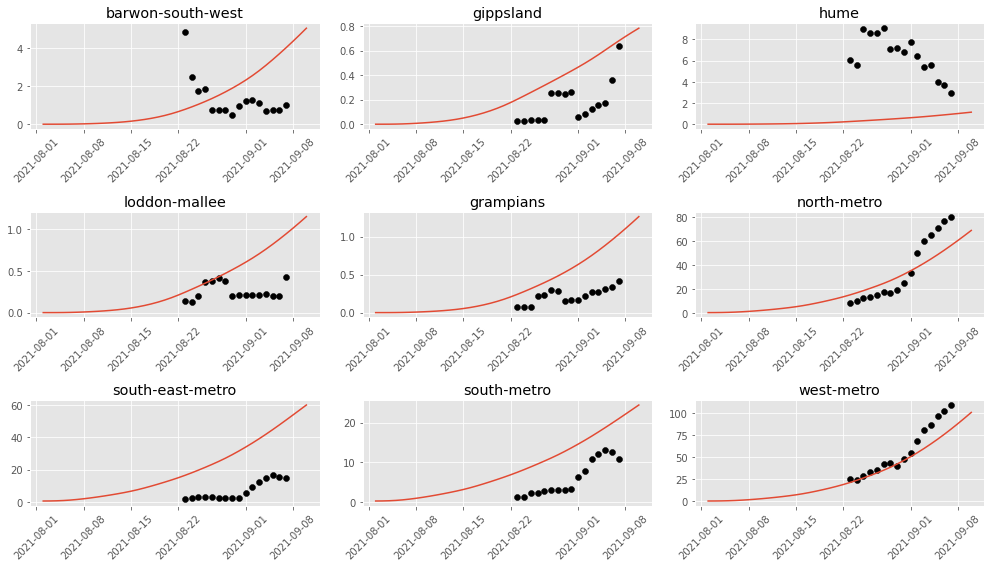

In [7]:
# Preparing
pyplot.style.use("ggplot")
fig = pyplot.figure(figsize=(14, 8))
for i_serv, service in enumerate(Region.VICTORIA_SUBREGIONS):
    
    # Collating data for plotting
    service_name = service.replace("-", "_")
    output = f"notifications_for_cluster_{service_name}"
    notif_dates, notif_values = get_target_series(project.calibration.targets, REF_DATE, output)
    
    # Plotting
    axis = fig.add_subplot(3, 3, i_serv + 1)
    axis.plot(derived_df[output])
    axis.scatter(notif_dates, notif_values, c="k")
    
    # Finishing up
    axis.set_title(service)
    
    pyplot.setp(axis.get_xticklabels(), rotation=45)
fig.tight_layout()

In [8]:
def plot_derived_outputs(requested_outputs):

    # Preparing
    pyplot.style.use("ggplot")
    fig = pyplot.figure(figsize=(14, 8))
    for i_out, output in enumerate(requested_outputs):

        # Plotting
        axis = fig.add_subplot(2, 2, i_out + 1)
        axis.plot(derived_df[output])

        try:
            target_dates, target_values = get_target_series(project.calibration.targets, REF_DATE, output)
            axis.scatter(target_dates, target_values, c="k")
        except:
            print(f"targets not available for {output}")

        # Finishing up
        axis.set_title(output)
        pyplot.setp(axis.get_xticklabels(), rotation=45)
    fig.tight_layout()

# Statewide indicators

targets not available for infection_deaths


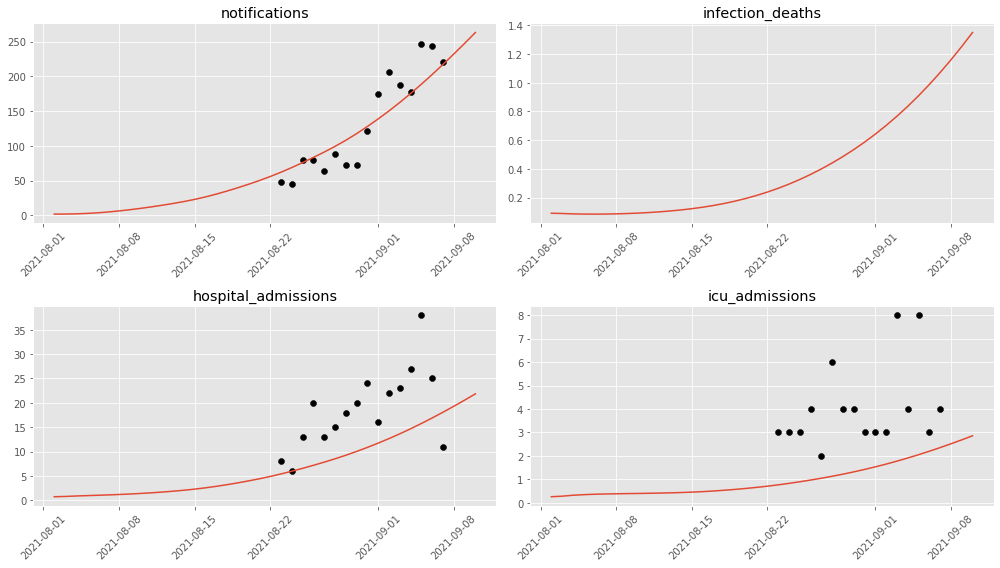

In [9]:
plot_derived_outputs(("notifications", "infection_deaths", "hospital_admissions", "icu_admissions"))

In [12]:
for i in range(1, 3):
    print(i)

1
2


# Contact tracing

targets not available for prevalence
targets not available for prop_detected_traced
targets not available for prop_contacts_with_detected_index
targets not available for traced_flow_rate


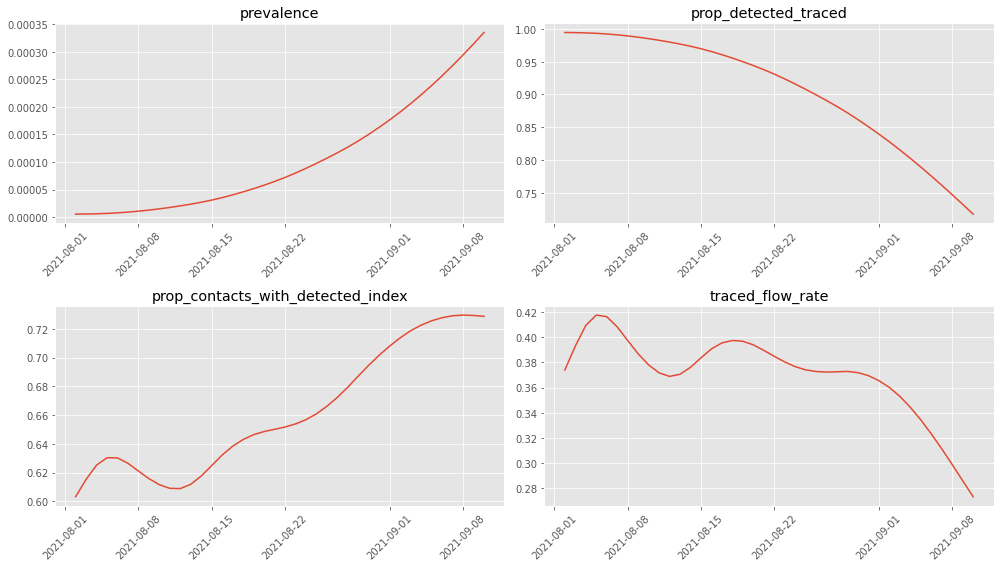

In [10]:
plot_derived_outputs(("prevalence", "prop_detected_traced", "prop_contacts_with_detected_index", "traced_flow_rate"))